In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MananMaheshwari1/Yoga-Recommendation-System/main/final%20data%20aasans.csv')
df.head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
0,1,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,NaN,NaN,NaN,NaN,Beginners
1,2,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",NaN,NaN,NaN,NaN,Beginners
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners
3,4,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,NaN,NaN,NaN,NaN,Beginners
4,5,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,NaN,NaN,NaN,NaN,Beginners


In [ ]:
# for column in ['Breathing', 'Awareness', 'Benefits']:
#   df[column].fillna('0',inplace = True)

In [ ]:
df.loc[[2]]
# df['Description'].head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners


In [ ]:
# Keeping only necessary columns
# df['new'] = df['Awareness'] + df['Breathing'] + df['Benefits']
# df = df[['AName','new']]
# df.shape
# df.loc[[233]]
df = df[['AName', 'Benefits']]
df

,AName,Benefits
0,Padanguli Naman,This group of asanas is concerned with looseni...
1,Goolf Naman,This group of asanas is concerned with looseni...
2,Goolf Chakra,This group of asanas is concerned with looseni...
3,Goolf Ghooman,All the foot and calf asanas help in returning...
4,Janufalak Akarshan,This group of asanas is concerned with looseni...
...,...,...
221,MOOLA BANDHA,"Moola bandha bestows many physical, mental and..."
222,UDDIYANA BANDHA,Uddiyana bandha is a panacea for the abdomen. ...
223,MAHA BANDHA,Maha bandha gives enhanced benefits of all thr...
224,JALA NETI,J ala neti removes mucus and pollution from th...


In [ ]:
# removing null rows
# df['new'].replace('000', np.nan, inplace=True)
# df.shape  
# df.loc[[233]]

In [ ]:
# df.dropna(subset=['new'], inplace=True)
# df.shape
df.dropna(subset=['Benefits'], inplace=True)
df.shape

(215, 2)

In [ ]:
df

,AName,Benefits
0,Padanguli Naman,This group of asanas is concerned with looseni...
1,Goolf Naman,This group of asanas is concerned with looseni...
2,Goolf Chakra,This group of asanas is concerned with looseni...
3,Goolf Ghooman,All the foot and calf asanas help in returning...
4,Janufalak Akarshan,This group of asanas is concerned with looseni...
...,...,...
221,MOOLA BANDHA,"Moola bandha bestows many physical, mental and..."
222,UDDIYANA BANDHA,Uddiyana bandha is a panacea for the abdomen. ...
223,MAHA BANDHA,Maha bandha gives enhanced benefits of all thr...
224,JALA NETI,J ala neti removes mucus and pollution from th...


In [ ]:
# df['new'].head()

In [ ]:
# df['new'] = df['new'].str.replace('Benefits:', '')
# df['new'] = df['new'].str.replace('Awareness:', '')
# df['new'] = df['new'].str.replace('Breathing:', '')
# df['new'] = df['new'].str.replace('Physical', '')
# df['new'][0]
# def cleanText(text):
#     text = re.sub(r'\s+',' ',text)
#     text = re.sub(r'\d',' ',text)
#     return text
# df['new'] = df['new'].apply(lambda x: cleanText(x))
# df['new'].head()

In [ ]:
df['Benefits'] = df['Benefits'].str.replace('Benefits:', '')
def cleanText(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d',' ',text)
    return text
df['Benefits'] = df['Benefits'].apply(lambda x: cleanText(x))
df['Benefits'].head()

0    This group of asanas is concerned with looseni...
1    This group of asanas is concerned with looseni...
2    This group of asanas is concerned with looseni...
3    All the foot and calf asanas help in returning...
4    This group of asanas is concerned with looseni...
Name: Benefits, dtype: object

In [ ]:
# tokenizer = RegexpTokenizer(r'\w+')
# df['new'] = df['new'].apply(lambda x: tokenizer.tokenize(x.lower()))
# df['new'].head()

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df['Benefits'] = df['Benefits'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Benefits'].head()

0    [this, group, of, asanas, is, concerned, with,...
1    [this, group, of, asanas, is, concerned, with,...
2    [this, group, of, asanas, is, concerned, with,...
3    [all, the, foot, and, calf, asanas, help, in, ...
4    [this, group, of, asanas, is, concerned, with,...
Name: Benefits, dtype: object

In [ ]:
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

In [ ]:
# df['new'] = df['new'].apply(lambda x: remove_stopwords(x))
# df['new'].head(2)

In [ ]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text if len(i) > 1]
  return lem_text

In [ ]:
df['Benefits'] = df['Benefits'].apply(lambda x: remove_stopwords(x))
df['Benefits'] = df['Benefits'].apply(lambda x: word_lemmatizer(x))
df['Benefits'].head(2)

0    [group, asana, concerned, loosening, joint, bo...
1    [group, asana, concerned, loosening, joint, bo...
Name: Benefits, dtype: object

In [ ]:
# df['new'] = df['new'].apply(lambda x: word_lemmatizer(x))

In [ ]:
# df['new'].head(2)

In [ ]:
train = df
# def tokenize_text(text):
#     tokens = []
#     for sent in nltk.sent_tokenize(text):
#         for word in nltk.word_tokenize(sent):
#             if len(word) < 2:
#                 continue
#             if word not in stopwords.words('english'):
#               tokens.append(word)
#     return tokens
train_corpus = train.apply(
    lambda r: TaggedDocument(words=r['Benefits'], tags=[r.AName]), axis=1)


In [ ]:
train_corpus.values[0]

TaggedDocument(words=['group', 'asana', 'concerned', 'loosening', 'joint', 'body', 'excellent', 'debilitated', 'rheumatism', 'arthritis', 'high', 'blood', 'pressure', 'heart', 'problem', 'ail', 'ments', 'vigorous', 'physical', 'exercise', 'advised', 'particularly', 'useful', 'eliminating', 'energy', 'blockage', 'joint', 'physical', 'body', 'improving', 'coordination', 'self', 'awareness', 'self', 'confidence'], tags=['Padanguli Naman'])

In [ ]:
for i in range(len(train_corpus)):
  print(train_corpus.values[i].tags)
len(train_corpus)

['Padanguli Naman']
['Goolf Naman']
['Goolf Chakra']
['Goolf Ghooman']
['Janufalak Akarshan']
['Janu Naman']
['Janu Chakra']
['Ardha Titali Asana']
['Shroni Chakra']
['Pooma Titali Asana']
['Mushtika Bandhana']
['Manibandha Naman']
['Manibandha Chakra']
['Kehuni Naman']
['Kehuni Chakra']
['Skandha Chakra']
['Greeva Sanchalana']
['Padotthanasana']
['Padachakrasana']
['Pada Sanchalanasana']
['Supta Pawanmuktasana']
['Jhulana Lurhakanasana']
['Supta Udarakarshanasana']
['Shava Udarakarshanasana']
['Naukasana']
['Rajju Karshanasana']
['Gatyatmak Meru Vakrasana']
['Chakki Chalanasana']
['Nauka Sanchalanasana']
['Kashtha Takshanasana']
['Namaskarasana']
['Vayu Nishkasana']
['Kauva Chalasana']
['Udarakarshanasana']
['Palming (Eye Exercise)']
['Blinking (Eye Exercise) ']
['Sideways Viewing (Eye Exercise)']
['Front and Sideways Viewing (Eye Exercise)']
['Up and Down Viewing (Eye Exercise)']
['Rotational Viewing (Eye Viewing)']
['Preliminary Nasikagra Drishti (preliminary nosetip gazing - Eye Ex

215

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=20, min_count=1, epochs=50,dm = 0,dbow_words = 1,window  = 50)
model.build_vocab(train_corpus)

In [ ]:
# model_dmm = gensim.models.doc2vec.Doc2Vec(dm = 1,vector_size=50, min_count=1, epochs=40)
# model_dmm.build_vocab([x for x in tqdm(train_corpus.values)])

In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
import pickle
pickle.dump(model, open("ml_model.sav", "wb"))

In [ ]:
ranks = []
second_ranks = []
for doc in train_corpus.values:
    inferred_vector = model.infer_vector(doc.words) 
    sims = model.docvecs.most_similar([inferred_vector], topn=4)
    print(sims)

[('Padanguli Naman', 0.96309894323349), ('Mushtika Bandhana', 0.961883544921875), ('Goolf Chakra', 0.9610419273376465), ('Manibandha Naman', 0.9590681791305542)]
[('Padanguli Naman', 0.9601036310195923), ('Mushtika Bandhana', 0.958629310131073), ('Goolf Chakra', 0.9575034379959106), ('Manibandha Naman', 0.956788182258606)]
[('Padanguli Naman', 0.9660417437553406), ('Mushtika Bandhana', 0.9640926718711853), ('Goolf Chakra', 0.962920069694519), ('Manibandha Naman', 0.9620943069458008)]
[('Goolf Ghooman', 0.9807906150817871), ('Skandha Chakra', 0.7457360625267029), ('Manibandha Chakra', 0.6631022095680237), ('UTTHITA LOLASANA', 0.6456502676010132)]
[('Padanguli Naman', 0.9655874967575073), ('Mushtika Bandhana', 0.9650595188140869), ('Goolf Chakra', 0.9631233811378479), ('Manibandha Naman', 0.9628711938858032)]
[('Mushtika Bandhana', 0.9645665287971497), ('Padanguli Naman', 0.9635511040687561), ('Manibandha Naman', 0.9627872705459595), ('Goolf Chakra', 0.9618044495582581)]
[('Janu Chakra',

In [ ]:
print(model.infer_vector(train_corpus[1].words))

[ 1.008847   -0.5089604  -0.37432292  0.61282146 -0.736758   -1.0433309
 -0.46052423  0.12123423 -1.8913721  -0.03379946 -0.3530937   0.4659098
  0.25705034 -0.8204613  -1.4129561   0.06413975 -0.9852421  -0.22491515
 -1.5627749   0.10235807]


In [ ]:
len(model.wv.vocab)

1388

In [ ]:
word_vectors = model.wv.vocab
for word in word_vectors:
  print(word)

group
asana
concerned
loosening
joint
body
excellent
debilitated
rheumatism
arthritis
high
blood
pressure
heart
problem
ail
ments
vigorous
physical
exercise
advised
particularly
useful
eliminating
energy
blockage
improving
coordination
self
awareness
confidence
foot
calf
help
returning
stagnant
lymph
venous
thus
relieve
tiredness
cramp
prevent
thrombosis
especially
bedridden
post
operative
patient
since
knee
bear
whole
weight
strong
muscle
support
vulnerable
injury
sprain
osteoarthritis
strengthen
quadriceps
ligament
around
rejuvenate
activating
healing
preparatory
practice
loo
ening
hip
meditative
pose
people
cannot
sit
con
fortably
cross
legged
position
practise
ardha
titali
daily
morning
evening
stage
prepare
leg
mastery
padmasana
inner
thigh
hold
lot
tension
relieved
also
remove
due
long
hour
standing
walking
hand
wrist
beneficial
related
caused
prolonged
writing
typing
shoulder
strain
driving
office
work
cervical
spondylitis
frozen
maintain
shape
chest
nerve
connecting
different
o

In [ ]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            if word not in stopwords.words('english'):
              tokens.append(word)
    return tokens

In [ ]:
text = "breath, mind and lungs and cleanse"
tex = tokenizer.tokenize(text.lower())
tex = remove_stopwords(tex)
tex = word_lemmatizer(tex)
vector = model.infer_vector(tex)
sims = model.docvecs.most_similar([vector], topn=10)
sims

[('Makarasana (crocodile pose)', 0.7771941423416138),
 ('Salamba Sirshasana (supported\nheadstand pose)', 0.7187098860740662),
 ('Kapali Asana (forehead supported pose)', 0.7147659659385681),
 ('Niralamba Sirshasana (unsupported headstand pose)', 0.7103375196456909),
 ('Sirshasana (headstand pose)', 0.7029898166656494),
 ('Saral Dhanurasana (easy bow pose)', 0.6935728192329407),
 ('Advasana (reversed corpse pose)', 0.6874186992645264),
 ('NADI SHODHANA PRANAYAMA', 0.686223030090332),
 ('UJJAYI PRANAYAMA ', 0.6736893653869629),
 ('Skandha Chakra', 0.6696716547012329)]

In [ ]:
word_vecs = model.wv
similarity = word_vecs.similarity('breath', 'leg')
similarity

0.27786443

In [ ]:
vector = model.infer_vector(text)
sims = model.docvecs.most_similar([vector], topn=10)
sims[0][0]
# model.docvecs.most_similar((tokens))
# print(vector)

'Jyestikasana (superior posture)'

In [ ]:
model['breath']

array([-0.7464873 , -0.32326284,  0.8552119 ,  0.10650203, -0.5493065 ,
       -0.68847066,  0.62712586,  0.46100184, -0.44117296,  0.12250422,
        1.2518276 ,  1.0813015 , -0.59958744, -1.3563621 , -0.44820505,
       -0.65972316,  0.06776838,  0.50720596, -1.06025   ,  0.03975464],
      dtype=float32)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
words = []
for i in range(40):
    words += train_corpus.values[i].tags

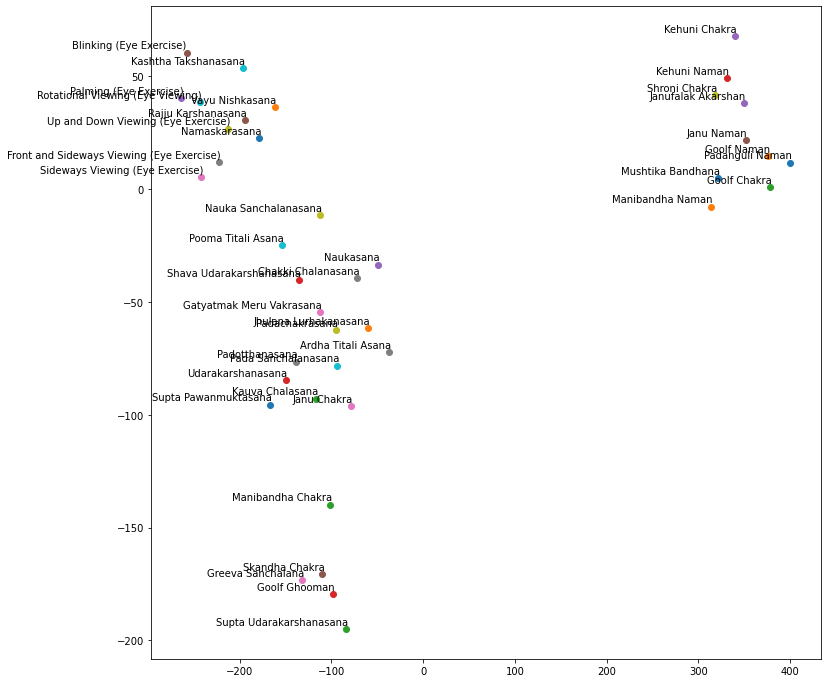

In [ ]:
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in words:
        wordvecs.append(model[word])
    for word in words:
        labels.append(word)    
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12,12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

In [ ]:
pip freeze > requirements.txt

In [ ]:
df.head()

,AName,Benefits
0,Padanguli Naman,"[group, asana, concerned, loosening, joint, bo..."
1,Goolf Naman,"[group, asana, concerned, loosening, joint, bo..."
2,Goolf Chakra,"[group, asana, concerned, loosening, joint, bo..."
3,Goolf Ghooman,"[foot, calf, asana, help, returning, stagnant,..."
4,Janufalak Akarshan,"[group, asana, concerned, loosening, joint, bo..."


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
# X = kmeans_model.fit(model.docvecs.doctag_syn0)
# labels=kmeans_model.labels_.tolist()
# l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
# pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
# datapoint = pca.transform(model.docvecs.doctag_syn0)

# plt.figure
# label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
# color = [label1[i] for i in labels]
# plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
# centroids = kmeans_model.cluster_centers_
# centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
# plt.show()

In [ ]:
# from scipy.cluster.vq import kmeans,vq

# NUMBER_OF_CLUSTERS = 15

# centroids, _= kmeans(model.docvecs, NUMBER_OF_CLUSTERS)

# # computes cluster Id for document vectors
# doc_ids,_ = vq(model.docvecs,centroids)

# # zips cluster Ids back to document labels 
# doc_labels = zip(model.docvecs.doctags.keys(), doc_ids)

In [ ]:
# from sklearn import metrics
 
# import gensim.models as g
# import codecs
 
 
# # model="doc2vec/doc2vec.bin"
# test_docs="data/test_docs.txt"
 
# #inference hyper-parameters
# start_alpha=0.01
# infer_epoch=1000
 
# #load model
# # m = g.Doc2Vec.load(model)
# test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines() ]
# m = model
# # print (test_docs)
# # """
# # [['the', 'cardigan', 'welsh', 'corgi'........
# # """
 
# X=[]
# for d in test_docs:
     
#     X.append( m.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )
    
 
# k=3
 
# from sklearn.cluster import Birch
 
# brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
# brc.fit(X)
 
# clusters = brc.predict(X)
 
# labels = brc.labels_
 
 
# print ("Clusters: ")
# print (clusters)
 
 
# silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
# print ("Silhouette_score: ")
# print (silhouette_score)
# print (silhouette_score)

In [ ]:
words = []
wordvecs = []
for i in range(len(train_corpus)):
    words += train_corpus.values[i].tags
for word in words:
        wordvecs.append(model[word])
# wordvecs
ar = np.array(wordvecs) 
ar.shape           

(215, 20)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=10, random_state=0)

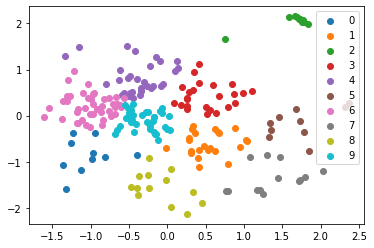

In [ ]:
pca = PCA(2)
 
#Transform the data
art = pca.fit_transform(ar)
art.shape
label = kmeans.fit_predict(art)
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(art[label == i , 0] , art[label == i , 1] , label = i)
plt.legend()
plt.show()

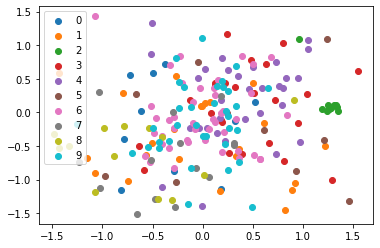

In [ ]:
#20 vectors
label2 = kmeans.fit_predict(ar)
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label2)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ar[label == i , 0] , ar[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
mylist = {}
for i in range(len(label)):
  if label[i] in mylist.keys():
    mylist[label[i]].append(train_corpus.values[i].tags)
  else:
    mylist[label[i]] = []
    mylist[label[i]].append(train_corpus.values[i].tags)

In [ ]:
mylist2 = {}
for i in range(len(label2)):
  if label2[i] in mylist2.keys():
    mylist2[int(label2[i])].append(train_corpus.values[i].tags)
  else:
    mylist2[int(label2[i])] = []
    mylist2[int(label2[i])].append(train_corpus.values[i].tags)

In [ ]:
mylist

{0: [['Ashwa Sanchalanasana (equestrian pose)'],
  ['TRIKONASANA'],
  ['Yogamudrasana (psychic union pose)'],
  ['Shalabhasana (locust pose)'],
  ['Pada Angushthasana (tiptoe pose)'],
  ['Poorna Shalabhasana (full locust pose)'],
  ['Dwi Pada Kandharasana (two-legged shoulder pose)'],
  ["Kashyapasana (Sage Kashyapa's pose)"],
  ['TADAGI MUDRA'],
  ['UDDIYANA BANDHA']],
 1: [['Palming (Eye Exercise)'],
  ['Padmasana (lotus pose)'],
  ['ANANDA MADIRASANA'],
  ['BHADRASANA'],
  ['Naman Pranamasana (prostration pose)'],
  ['PRANAMASANA'],
  ['Baddha Padmasana (locked lotus pose)'],
  ['Gatyatmak Paschimottanasana (dynamic back stretch pose)'],
  ['Moordhasana. (crown-based pose)'],
  ['Sirshasana (headstand pose)'],
  ['Salamba Sirshasana (supported\nheadstand pose)'],
  ['Niralamba Sirshasana (unsupported headstand pose)'],
  ['Kapali Asana (forehead supported pose)'],
  ['Padma Parvatasana (lotus mountain pose)'],
  ['BHRAMARI PRANAYAMA '],
  ['BHASTRIKA PRANAYAMA'],
  ['KAPALBHATI PRAN

In [ ]:
mylist2

{0: [['Janu Chakra'],
  ['Padachakrasana'],
  ['Pada Sanchalanasana'],
  ['Rajju Karshanasana'],
  ['Gatyatmak Meru Vakrasana'],
  ['Namaskarasana'],
  ['Vayu Nishkasana'],
  ['Kauva Chalasana'],
  ['Front and Sideways Viewing (Eye Exercise)'],
  ['Up and Down Viewing (Eye Exercise)'],
  ['Ashwa Sanchalanasana (equestrian pose)'],
  ['SUPTA VAJRASANA'],
  ['TADASANA'],
  ['TIRYAKA TADASANA'],
  ['TIRYAKA KATI CHAKRASANA'],
  ['MERU PRISHTHASANA'],
  ['UTTHANASANA'],
  ['DRUTA UTKATASANA'],
  ['DWIKONASANA'],
  ['UTTHITA LOLASANA'],
  ['DOLASANA'],
  ['PARVATASANA'],
  ['ASHTANGA NAMASKARA'],
  ['Tolangulasana (weighing scale pose)'],
  ['Tiryaka Bhujangasana (twisting cobra pose)'],
  ['Saithalyasana (animal relaxation pose)'],
  ['Paschimottanasana (back stretching pose)'],
  ['Hasta Pada Angushthasana (finger to toe stretch)'],
  ['Meru Akarshanasana (spinal bending pose)'],
  ['Sirsha Angustha Yogasana (head to toe pose)'],
  ['Utthita Janu Sirshasana (standing head between knees po

In [ ]:
import random
result = []
for i in mylist.keys():
    k = random.randint(0, len(mylist[i])-1)
    result.append(mylist[i][k])

In [ ]:
result

[['AKARNA DHANURASANA'],
 ['Santolanasana (balancing pose)'],
 ['KATI CHAKRASANA'],
 ['Jhulana Lurhakanasana'],
 ['SHASHANKASANA'],
 ['JALANDHARA BANDHA'],
 ['Hridaya Mudra (heart gesture) '],
 ['Moolabandhasana (perineal contraction pose)'],
 ['Bhoochari Mudra (gazing into nothingness) '],
 ['Poorna Shalabhasana (full locust pose)']]

In [ ]:
import random
result = []
for i in mylist2.keys():
    k = random.randint(0, len(mylist2[i]) - 1)
    result.append(mylist2[i][k])

In [ ]:
result

[['Shroni Chakra'],
 ['Makarasana (crocodile pose)'],
 ['Poorwa Halasana (preliminary plough pose)'],
 ['Shalabhasana (locust pose)'],
 ['TADAGI MUDRA'],
 ['Niralamba Paschimottanasana (unsupported back\nstretching pose)'],
 ['Nasikagra Drishti (nosetip gazing)'],
 ['Eka Hasta Bhujasana (single hand and arm pose)'],
 ['Sirshasana (headstand pose)'],
 ['Shanmukhi Mudra (closing the seven gates)']]

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/MananMaheshwari1/Yoga-Recommendation-System/main/final%20data%20aasans.csv')
data.head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
0,1,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,NaN,NaN,NaN,NaN,Beginners
1,2,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",NaN,NaN,NaN,NaN,Beginners
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners
3,4,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,NaN,NaN,NaN,NaN,Beginners
4,5,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,NaN,NaN,NaN,NaN,Beginners


In [ ]:
import json 
     
with open("sample.json", "w") as outfile: 
    json.dump(List, outfile)

In [ ]:
List  = {}
for i in mylist2.keys():
  temp = []
  for j in range(len(mylist2[i])):
    temp.append(data.loc[data['AName'] == mylist2[i][j][0]].values[0][0])
  List[int(i)] = temp